<a href="https://colab.research.google.com/github/RJuro/am-21/blob/main/AM_calc_aflevering-l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Peer-feedback aflevering Anvendt Metematik - Calculus

![](https://source.unsplash.com/GzDrm7SYQ0g)

# Opgave 1

I denne del arbejder vi med funktionen $f(x) = x^3 - 6x^2 -63x + 42$

In [1]:
# import af alle pakker, som der er brug for i opgaven

import numpy as np
import matplotlib.pyplot as plt
from sympy import *

### 1.1 - Plot funktionen 

- brug numpy og pyplot/matplotlib
- plot for $-15 ≤ x ≤ 15$

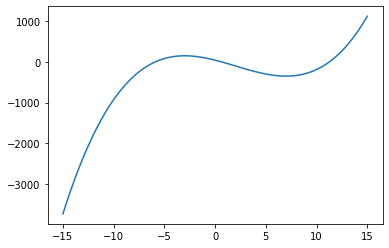

In [2]:
# brug np.linspace til at generere 100 værdier og plot funktionen
x = np.linspace(-15, 15, num=100)
y = x**3 - 6*x**2 -63*x +42

plt.plot(x,y)

### 1.2 - Find sekantlinjen 

- Beregn den lineære ligning $s = mx+b$ der beskriver sekanten i de to punkter $x_1 = -10$ og $x_2 = 0$
- Du skal først finde $y_1, y_2$ og $m, b$
- plot $f(x)$ og $s(x)$

OBS: der bruges lidt afvigende variablebetegnelser (fra de matematiske udtryk) i koden.



In [3]:
# definer symboler og funktionen (brug x0 i stedet for x)
x0 = symbols('x0')

f = x0**3 - 6*x0**2 -63*x0 +42
f

x0**3 - 6*x0**2 - 63*x0 + 42

In [4]:
# beregn y1 og y2 i SymPy
x1 = -10
x2 = 0

y1 = f.subs(x0,x1)
y2 = f.subs(x0,x2)

In [6]:
print(y1)
print(y2)

-928
42


In [7]:
# beregn hældningen m
m = (y2-y1)/(x2-x1)

In [9]:
# beregn b ved at omskrive s = m*x + b

b = y1 - m* x1

In [10]:
b

42

In [12]:
# beregn alle s-værdier ved at indsætte x-værdier som blev genereret med linspace
s = m*x + b

In [ ]:
s

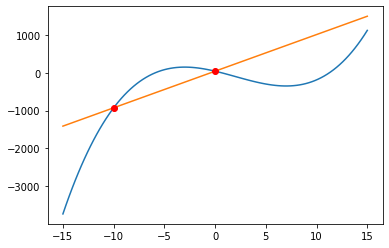

In [14]:
# plot f(x) og s(x) som går gennem x1 og x2
plt.plot(x,y)
plt.plot(x,s)

plt.plot([x1,x2],[y1,y2], 'o', c='red') #extra :-)

### 1.3 - Find tangentlinjen 

- Beregn den lineære ligning $t = mx+b$ der beskriver tangenten i $x_3 = -7$
- Du skal først finde $y_3$
- Brug **differenskvotienten** og beregn hældning i $x_3$ for $\lim_{h\to0}$
- plot $f(x)$ og $t(x)$

OBS: der bruges lidt afvigende variablebetegnelser (fra de matematiske udtryk) i koden.


In [15]:
# beregn y3 ved at indsætte x3

x3 = -7
y3 = f.subs(x0, x3)

In [16]:
# definer h symbollet
h = symbols('h')

In [17]:
# definer f(x+h) ved at erstatte x0 for x0+h i f(x)
fh = f.subs(x0, x0+h)

In [18]:
fh

-63*h - 63*x0 + (h + x0)**3 - 6*(h + x0)**2 + 42

In [19]:
# definer ligninen for hældning af tangenten mt
# udskriv mt og kontroler
mt = (fh-f)/h

In [20]:
mt

(-63*h - x0**3 + 6*x0**2 + (h + x0)**3 - 6*(h + x0)**2)/h

Differenskvotienten burde være:
$$\frac{- 63 h - x_{0}^{3} + 6 x_{0}^{2} + \left(h + x_{0}\right)^{3} - 6 \left(h + x_{0}\right)^{2}}{h}$$

In [22]:
# beregn hældningen m3 i x3 ved at regne grænseværdien for h -> 0 og indsætte x3
m3 = mt.limit(h, 0).subs(x0, x3)

In [24]:
# beregn b3 ved at omkskrive t = m3 * x + b3

b3 = y3 - m3 * x3

In [25]:
# beregn alle t-værdier ved at indsætte x-værdier som blev genereret med linspace
t = m3*x + b3

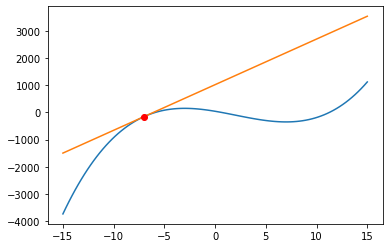

In [26]:
# plot f(x) og t(x) i x3
plt.plot(x,y)
plt.plot(x,t)

plt.plot(x3,y3,'o', c='red')

### 1.4 - Find ekstrempunkter

- Brug SymPy og differentering til at finde maximum og minimum i $f(x)$
- Brug først `factor()` funktionen, som kan hjælpe med at finde ekstrempunkter "manuelt"
- Vis derefter, hvordan man kan finde punkterne "automatisk"
- Lav manuel test for min/max ved at se på ændinger i fortegn

In [27]:
# find den afledede funktion fd (sympy) og udskriv
fd = f.diff()
fd

3*x0**2 - 12*x0 - 63

In [28]:
# brug factor() funktionen til at faktorisere den afledede funktion; se, om du kan find
# de 2 ekstrempunkter uden videre beregning
fd.factor()

3*(x0 - 7)*(x0 + 3)

In [29]:
# brug sympy til at finde de 2 ekstrempunkter
solveset(fd, x0)

FiniteSet(-3, 7)

In [30]:
# generer værdier som kan bruges for at undersøge ændringer af fortegn
sign_chart = [-4,-3,6,7,8]

In [31]:
# beregn hældningsværdier (list-comprehension)
[fd.subs(x0,i) for i in sign_chart]

[33, 0, -27, 0, 33]

# Opgave 2 - Omkostningsminimering

Efter regeringens udspil om udflytning af studier skal Viborg Kommune i gang med at bygge nye boliger i Foulum. Det viser sig, at flere studerende end antaget skal have det godt og sjovt i Foulum fra 2024 og der er nu tale om maksimalt **300** nye studieboliger, som kan bygges.
Det er dog ikke billigt at bygge og heller ikke at veligeholde ejendomme. $C(z) =10000 + 35z - 0.1z^2$ er funktionen, der beskriver gennemsnitlige omkostninger forbundet med veligeholdelse per dag.
Hvor mange boliger skal er bygges, således omkostninger kan reduceres under antagelsen, at der findes folk, som vil flytte dertil for at læse...




### 2.1 - Definer og plot funktionen $C(z)$

- definer funktionen og gem i $c$ (symbolsk)
- brug numpy/matplotlib til at plotte for $-100≤z≤400$

In [32]:
# definer symbol z
z = symbols('z')

In [33]:
# definer c(z) som c
c = 10000 + 35*z - 0.1*z**2
c

-0.1*z**2 + 35*z + 10000

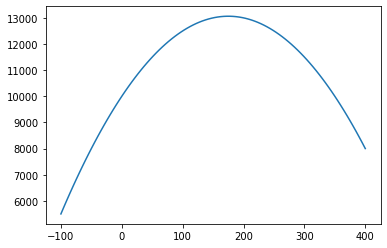

In [34]:
# plot funktionen mellem -100 of 400; brug z_plot i stedet for x (som vi eller bruger)
z_plot = np.linspace(-100, 400, num=100)

y = 10000 + 35*z_plot - 0.1*z_plot**2

plt.plot(z_plot,y)

### 2.2 - Find ekstrempunktet

- Hvor er ekstrempunktet?
- Man vil gerne bygge så mange boliger, som man kan samt minimere omkostninger: Hvor mange burde man bygge, hvis man maksimalt har plads til 300?

In [35]:
# find ekstremum
solveset(c.diff())

FiniteSet(175.0)

In [36]:
# lav liste med mulige antal af boliger (f.eks. ingen, z i ekstrempunktet, maksimal antal boliger, der kan bygges)
solutions = [0, 175, 300]

In [37]:
# beregn omkostninger for disse løsninger
[c.subs(z, i) for i in solutions]

[10000, 13062.5000000000, 11500.0000000000]

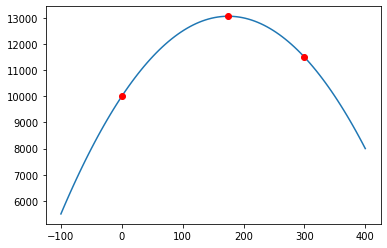

In [38]:
z_plot = np.linspace(-100, 400, num=100)

y = 10000 + 35*z_plot - 0.1*z_plot**2

plt.plot(z_plot,y)
plt.plot(solutions, [c.subs(z, i) for i in solutions], 'o', c='r')

In [ ]:
# man skal bygge

z_optimal = 300 # boliger